In [1]:
# Question 4: Configuring the Batch Size
# Description: Experiment with different batch sizes and observe model convergence speed.

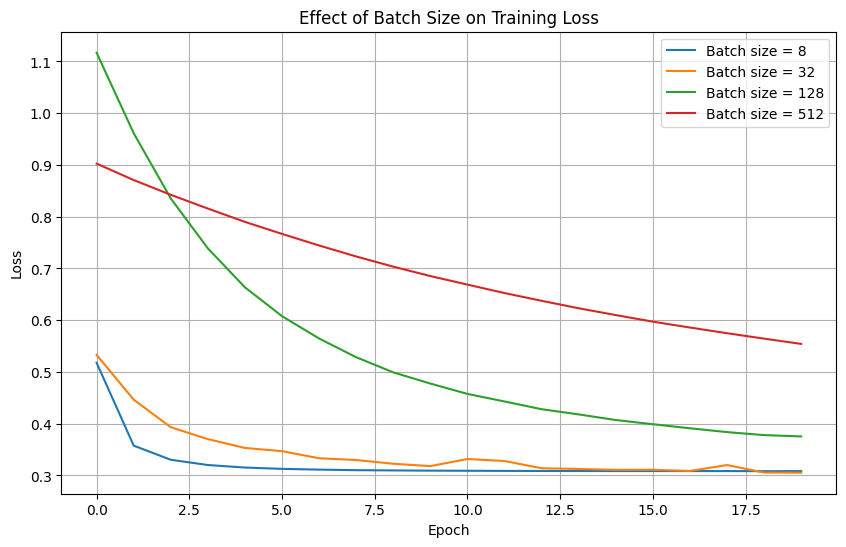

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_classification
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt

# Synthetic binary classification data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2)
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)
dataset = TensorDataset(X, y)

# Simple model
class SimpleNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = nn.Linear(20, 2)
    def forward(self, x):
        return self.fc(x)

# Training function
def train_model(batch_size):
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    model = SimpleNN()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01)
    losses = []
    for epoch in range(20):
        epoch_loss = 0
        for batch_X, batch_y in dataloader:
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        losses.append(epoch_loss / len(dataloader))
    return losses

# Batch sizes to test
batch_sizes = [8, 32, 128, 512]
results = {bs: train_model(bs) for bs in batch_sizes}

# Plot losses
plt.figure(figsize=(10,6))
for bs, loss in results.items():
    plt.plot(loss, label=f"Batch size = {bs}")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Effect of Batch Size on Training Loss')
plt.legend()
plt.grid(True)
plt.show()
